### **Planteamiento de la problemática**
​
Hemos sido contratados en el equipo de ciencias de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de mercado de una importante automotriz china. Se desea ingresar a nuestro mercado de automóviles, por lo que nos han encomendado analizar las características de los vehículos presentes en el mercado actual. 


Para ello, nuestro departamento de datos ha recopilado precios y características de varios de los modelos de vehículos disponibles en nuestro mercado, junto con sus precios de venta al público.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%config Completer.use_jedi = False
pd.options.display.max_columns = None

### Preparacion de datos


In [2]:
df_cars=pd.read_csv('C:/Users/Valen/Desktop/HENRY/MODULOS/MODULO 6/M6/Proyecto Integrador/Propuesta 2/ML_cars.csv')

In [3]:
df_cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
df_cars.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df_cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Analizamos los registros duplicados basandonos en la columna car_ID

In [7]:
data_duplicates_df_cars =  df_cars.duplicated(subset=["car_ID"], keep="first")
print("registros duplicados en df_cars (car id): ", any(data_duplicates_df_cars))

registros duplicados en df_cars (car id):  False


In [8]:
data_duplicates_df_cars

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [9]:
df_cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [10]:
inicial = ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
cambio= ['4','6','5','3','12','2','8']

In [11]:
# Realizar el reemplazo basado en la columna 'cylindernumber'

 dic = dict(zip(inicial, cambio))
df_cars['cylindernumber'] = df_cars['cylindernumber'].replace(dic)
df_cars['cylindernumber']=df_cars['cylindernumber'].astype(float)

In [12]:
variables_numericas = df_cars[['car_ID', 'symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [13]:
variables_numericas_sin_precio = df_cars[['car_ID', 'symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [14]:
variables_numericas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   cylindernumber    205 non-null    float64
 8   enginesize        205 non-null    int64  
 9   boreratio         205 non-null    float64
 10  stroke            205 non-null    float64
 11  compressionratio  205 non-null    float64
 12  horsepower        205 non-null    int64  
 13  peakrpm           205 non-null    int64  
 14  citympg           205 non-null    int64  
 15  highwaympg        205 non-null    int64  
 16  price             205 non-null    float64
dt

In [15]:
variables_numericas.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
variables_numericas_box1 = df_cars[[                    #Creo variables para realizar los bloxplot para cada columna asignada
       'carlength', 'enginesize', 'horsepower']]

In [17]:
variables_numericas_box2 = df_cars[[ 'wheelbase', 'carwidth', 'carheight'
       , 'citympg', 'highwaympg']]

In [18]:
variables_numericas_box3 =  df_cars[[ 'curbweight','peakrpm']]

In [19]:
variables_numericas_box4= df_cars[['boreratio','stroke','compressionratio']]

### Creo boxplots que permitiran ver los valores para cada una de las variables.

<Axes: >

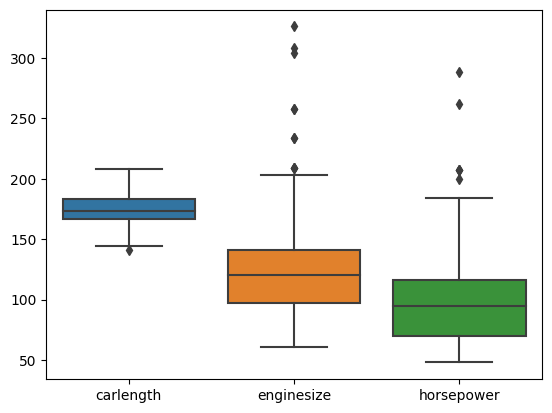

In [20]:
sns.boxplot(data=variables_numericas_box1) 

<Axes: >

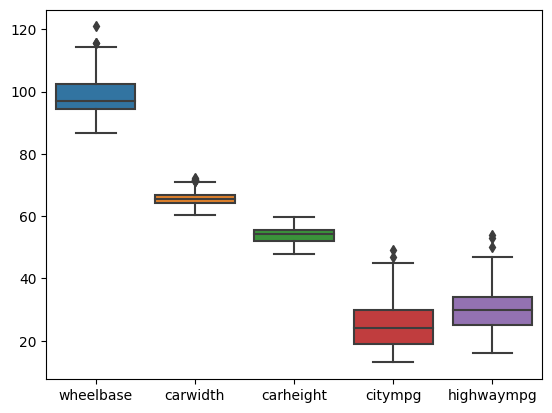

In [21]:
sns.boxplot(data=variables_numericas_box2)

<Axes: >

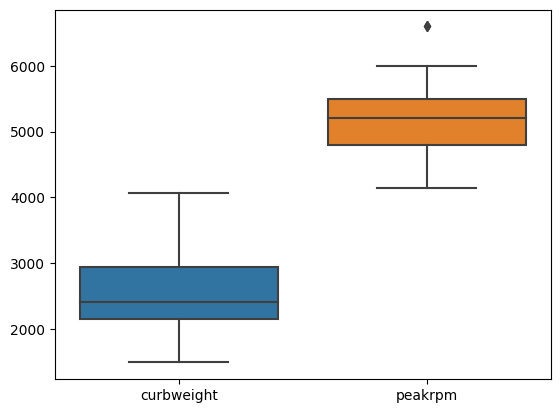

In [22]:
sns.boxplot(data=variables_numericas_box3)

<Axes: >

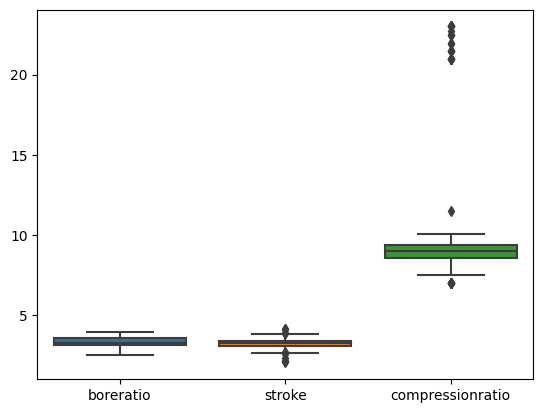

In [23]:
sns.boxplot(data=variables_numericas_box4)

In [24]:
corr_variables_numericas = variables_numericas.corr()

<Axes: >

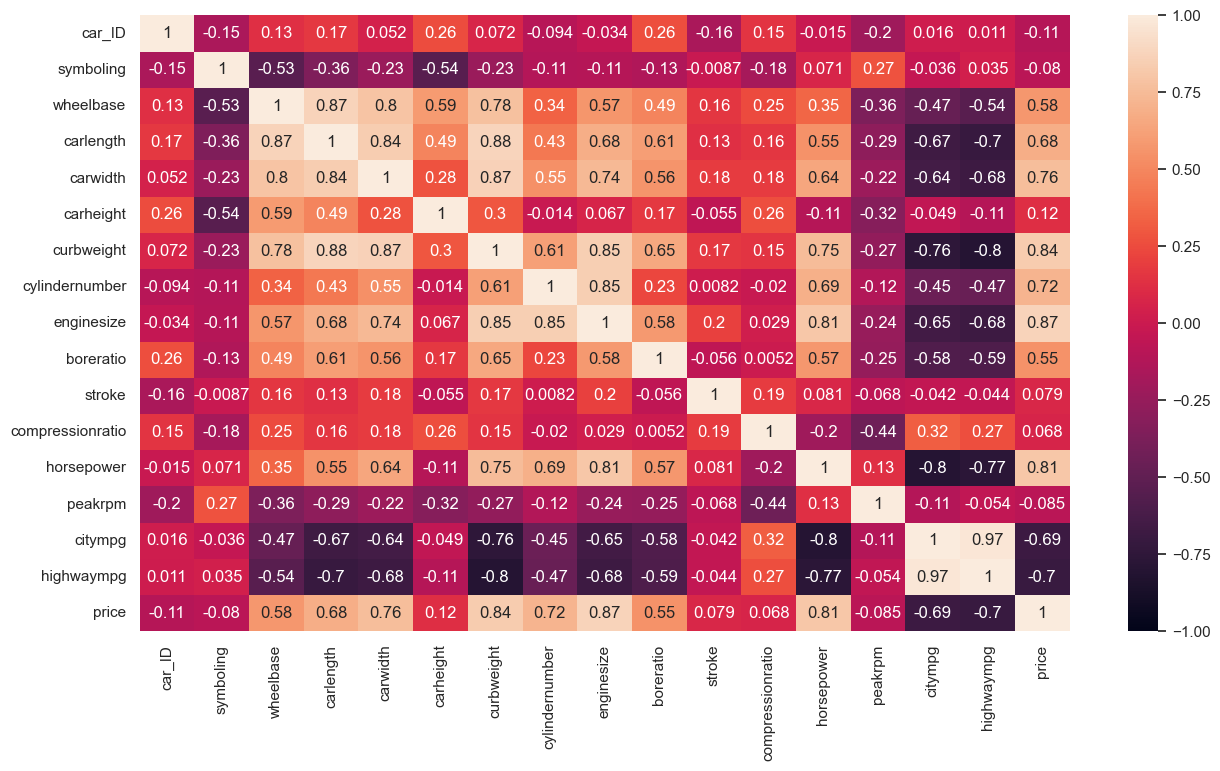

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_variables_numericas,annot=True, vmax=1,vmin=-1)

In [26]:
df_cars[['Marca', 'Modelo']] = df_cars['CarName'].str.split(' ', n=1, expand=True)

In [27]:
df_cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca,Modelo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4.0,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4.0,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6.0,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6.0,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [28]:
#Reemplazo los valores erroneos por valores correctos

marcamal = ['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen', 'volkswagen']
marcabien= ['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw']
dicMarca = dict(zip(marcamal, marcabien))
# Realizar el reemplazo basado en el diccionario
df_cars['Marca'] = df_cars['Marca'].replace(dicMarca)

In [29]:
df_cars['Marca'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'vw', 'volvo'], dtype=object)

In [30]:
variables_categoricas =['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
        'fuelsystem','Marca']

In [31]:
dfCars= pd.get_dummies(
                           df_cars,columns=variables_categoricas, 
                            drop_first = False, dtype=int)

In [32]:
df_cars.doornumber.unique()

array(['two', 'four'], dtype=object)

In [33]:
inicialdoor = ['two','four']
cambiodoor= [2,4]


In [34]:
dicdoor = dict(zip(inicialdoor, cambiodoor))
# Realizar el reemplazo basado en el diccionario
dfCars['doornumber'] = dfCars['doornumber'].replace(dicdoor)
dfCars['doornumber']=dfCars['doornumber'].astype(float)

In [35]:
dfCars

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Modelo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Marca_alfa-romeo,Marca_audi,Marca_bmw,Marca_buick,Marca_chevrolet,Marca_dodge,Marca_honda,Marca_isuzu,Marca_jaguar,Marca_mazda,Marca_mercury,Marca_mitsubishi,Marca_nissan,Marca_peugeot,Marca_plymouth,Marca_porsche,Marca_renault,Marca_saab,Marca_subaru,Marca_toyota,Marca_volvo,Marca_vw
0,1,3,alfa-romero giulia,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4.0,109.1,188.8,68.9,55.5,2952,4.0,141,3.78,3.15,9.5,114,5400,23,28,16845.0,145e (sw),0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
201,202,-1,volvo 144ea,4.0,109.1,188.8,68.8,55.5,3049,4.0,141,3.78,3.15,8.7,160,5300,19,25,19045.0,144ea,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
202,203,-1,volvo 244dl,4.0,109.1,188.8,68.9,55.5,3012,6.0,173,3.58,2.87,8.8,134,5500,18,23,21485.0,244dl,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
203,204,-1,volvo 246,4.0,109.1,188.8,68.9,55.5,3217,6.0,145,3.01,3.40,23.0,106,4800,26,27,22470.0,246,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


fueltype
gas       185
diesel     20
Name: count, dtype: int64


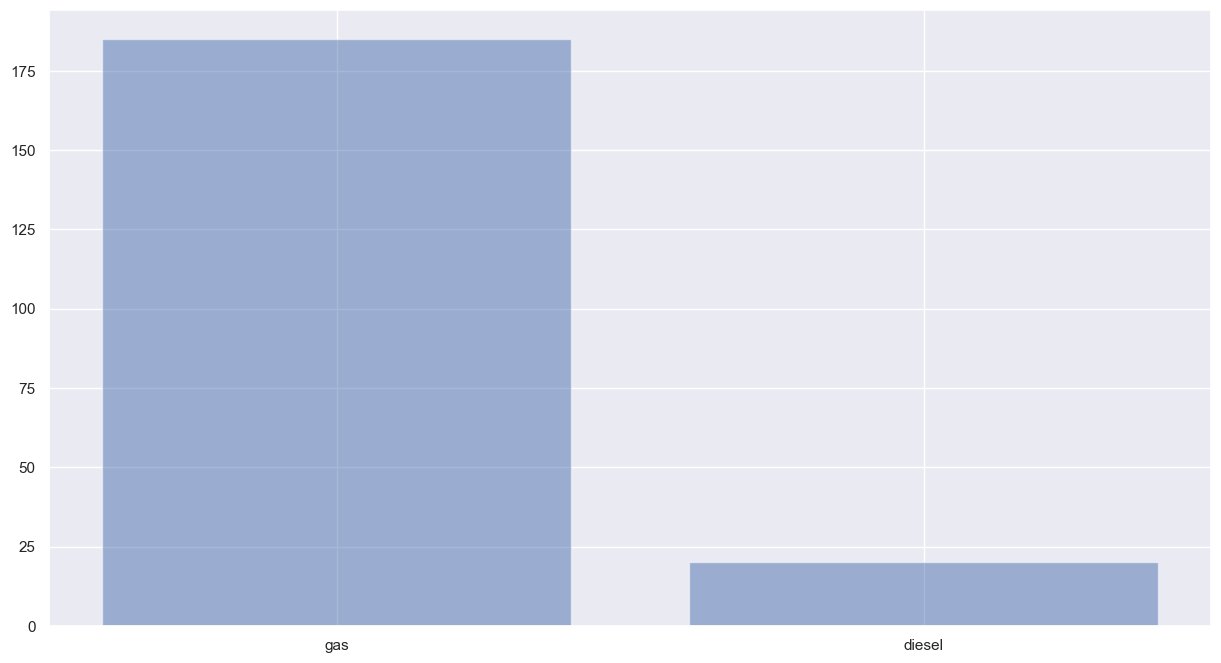

aspiration
std      168
turbo     37
Name: count, dtype: int64


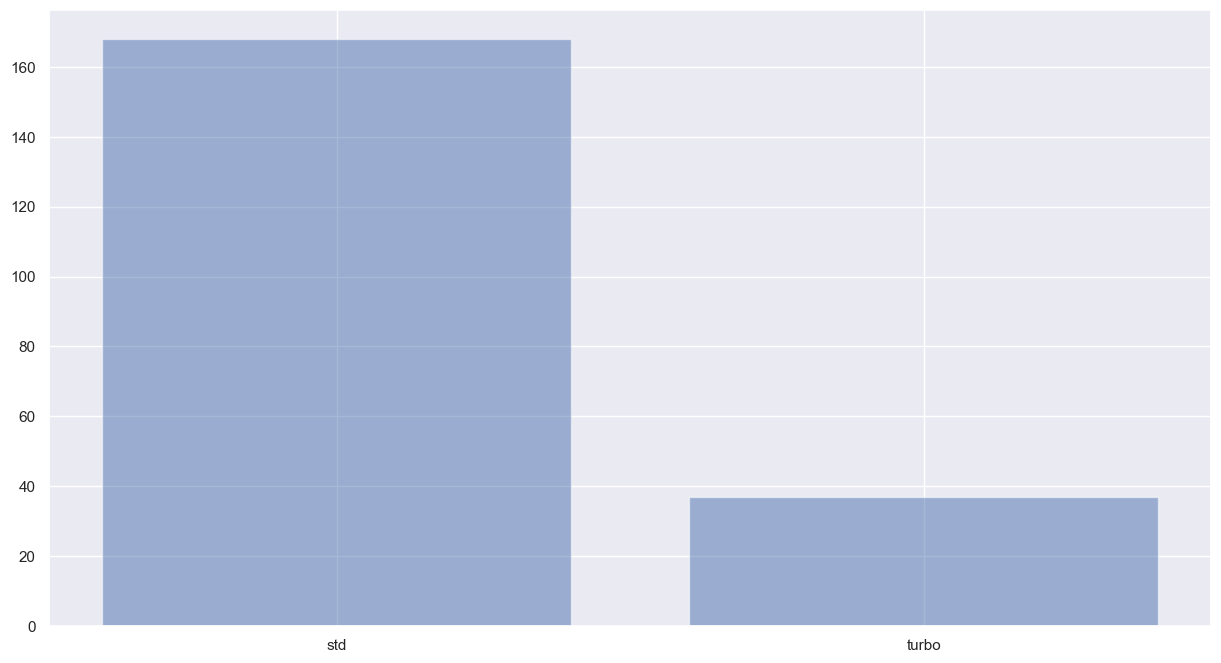

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


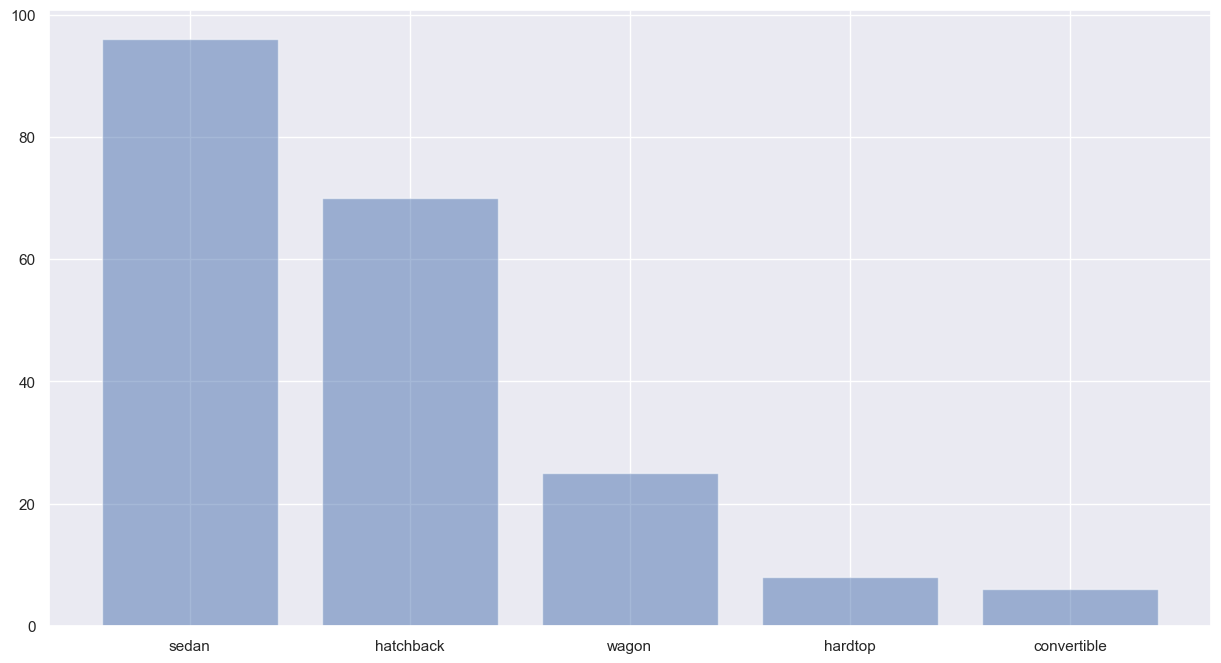

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


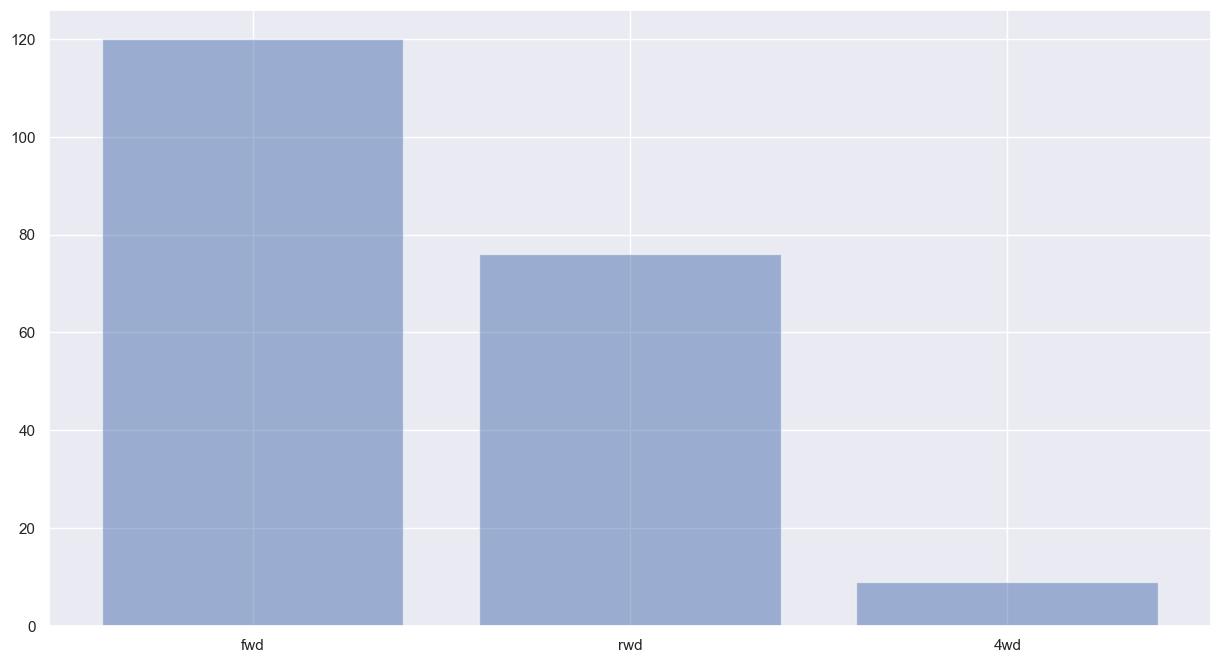

enginelocation
front    202
rear       3
Name: count, dtype: int64


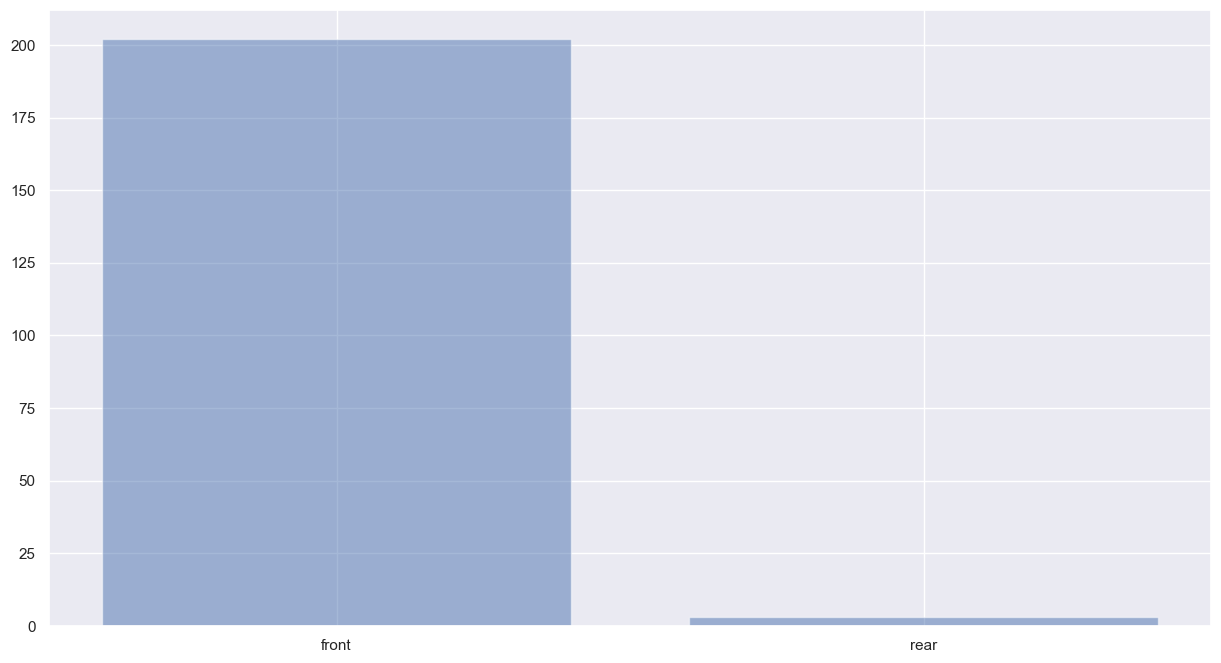

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


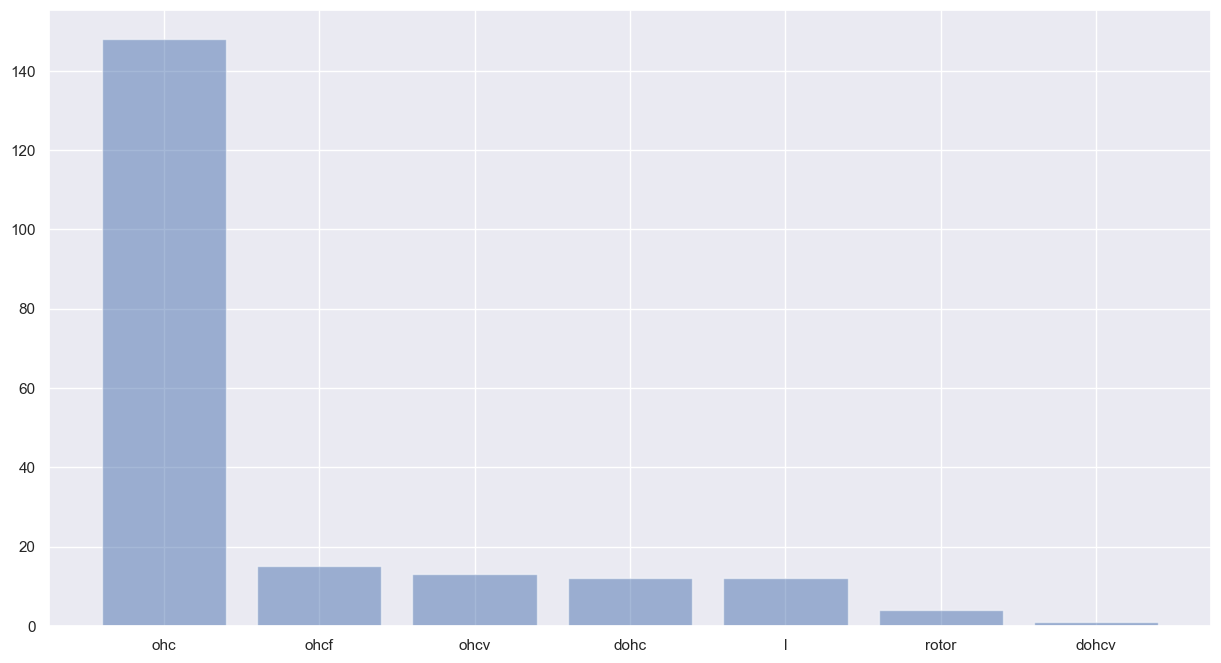

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


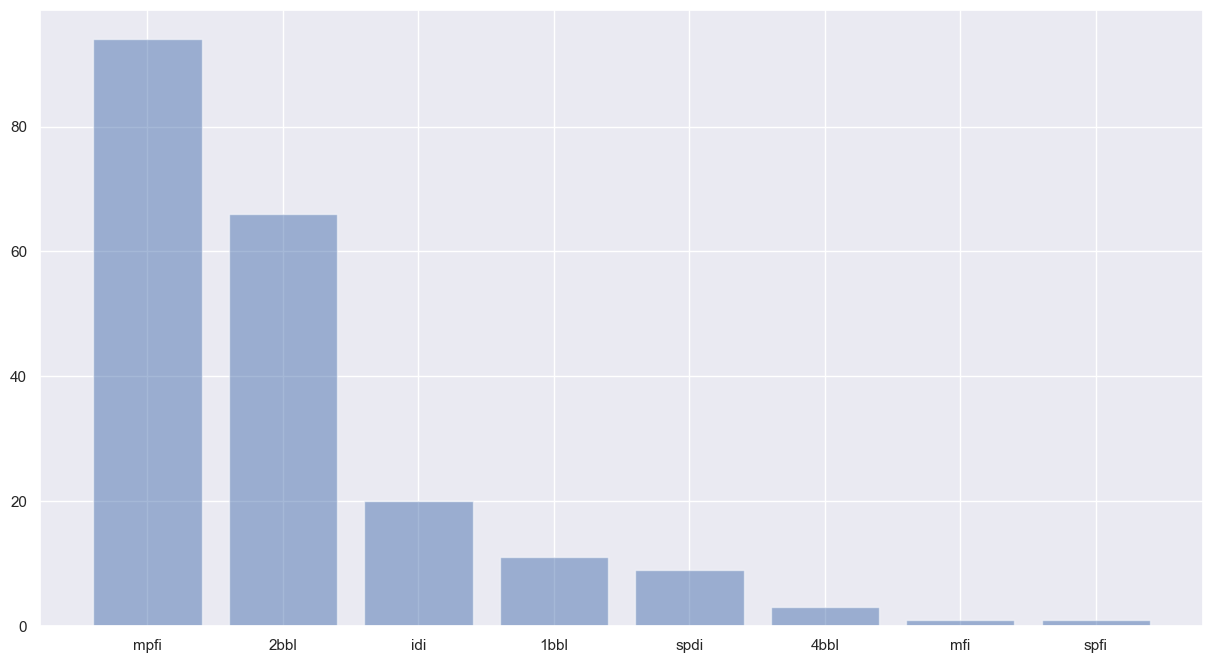

Marca
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
vw            12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
Name: count, dtype: int64


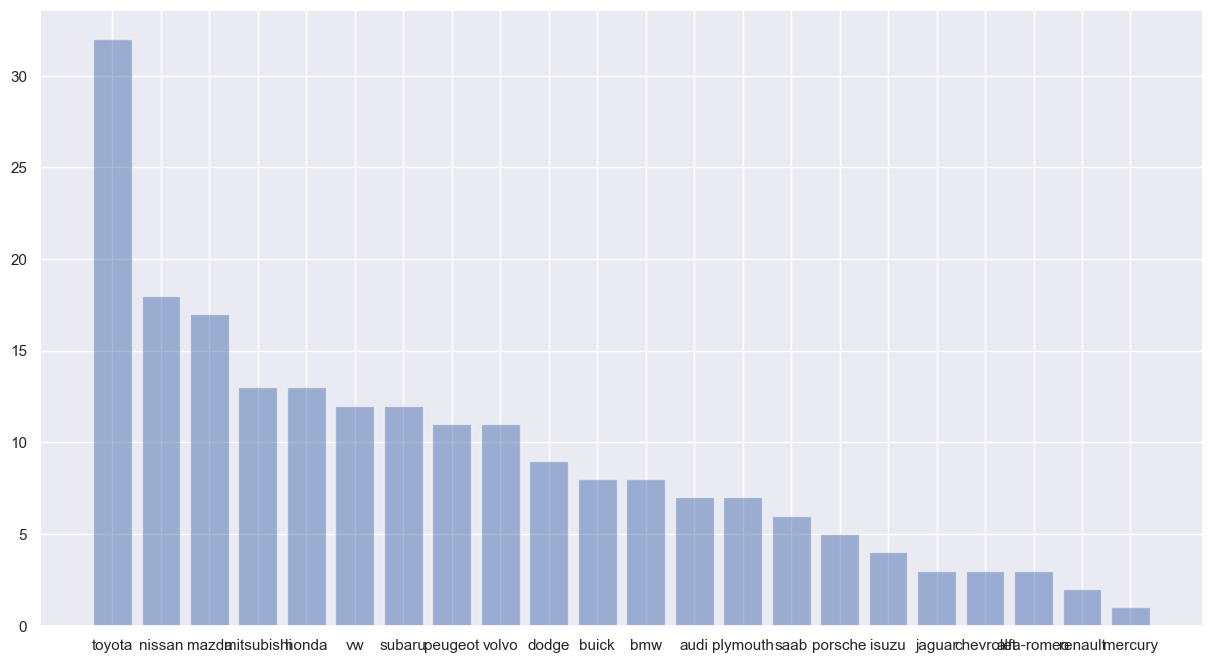

In [36]:
for category in variables_categoricas:
    print(df_cars[category].value_counts())
    plt.bar(df_cars[category].value_counts().index, df_cars[category].value_counts().values, color='b',\
            alpha=0.5)
    plt.show()

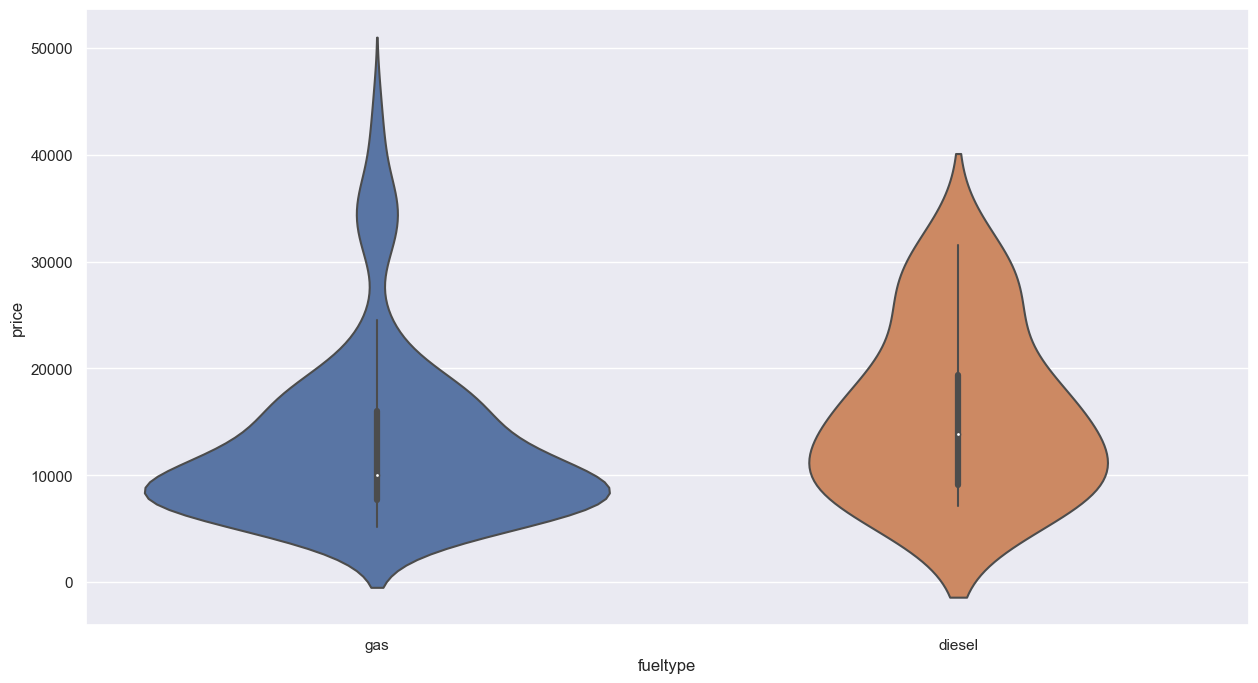

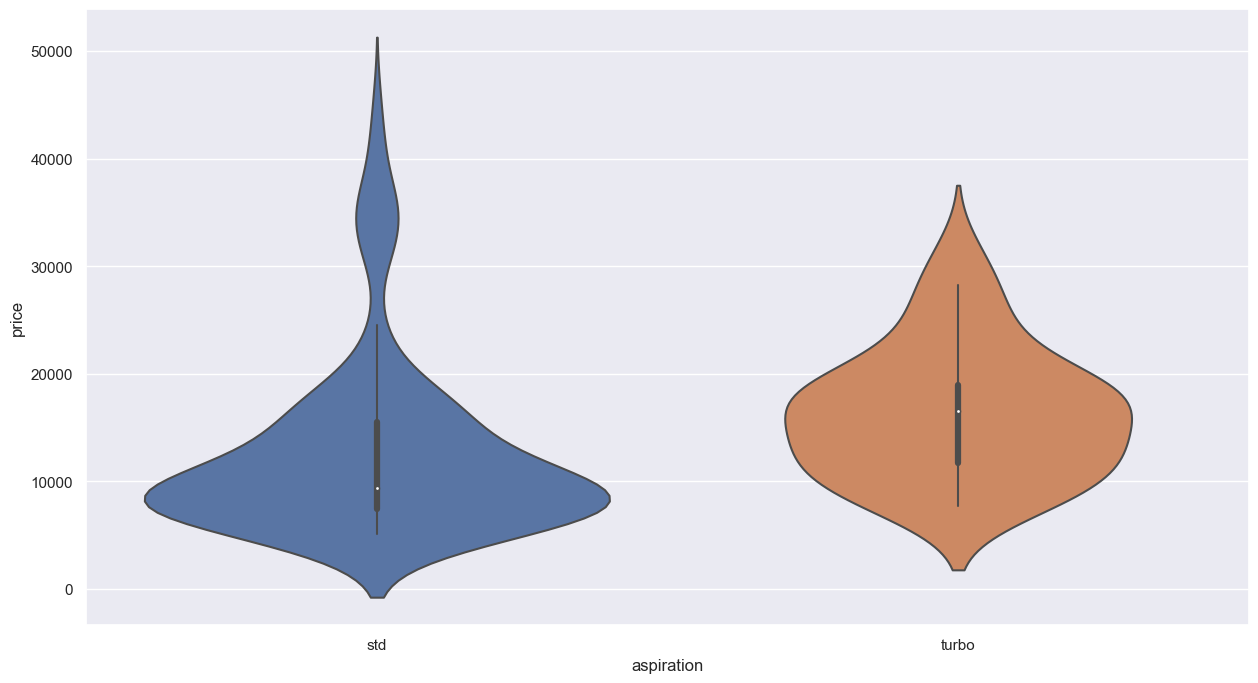

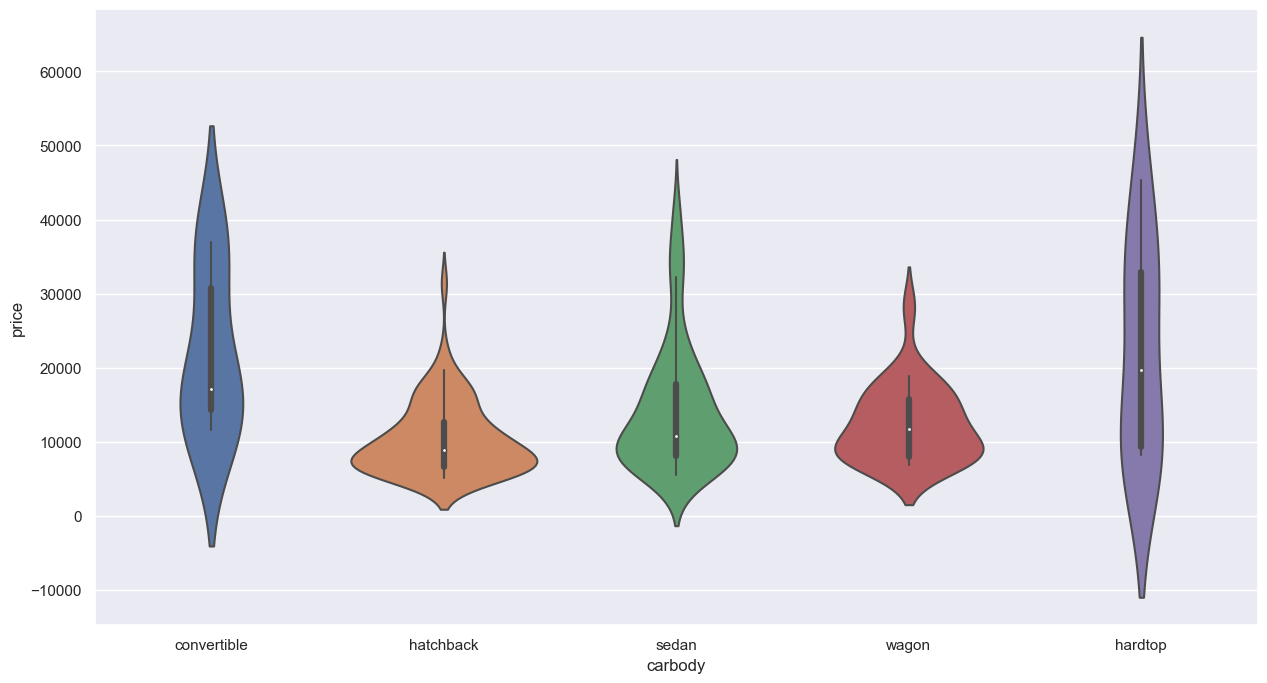

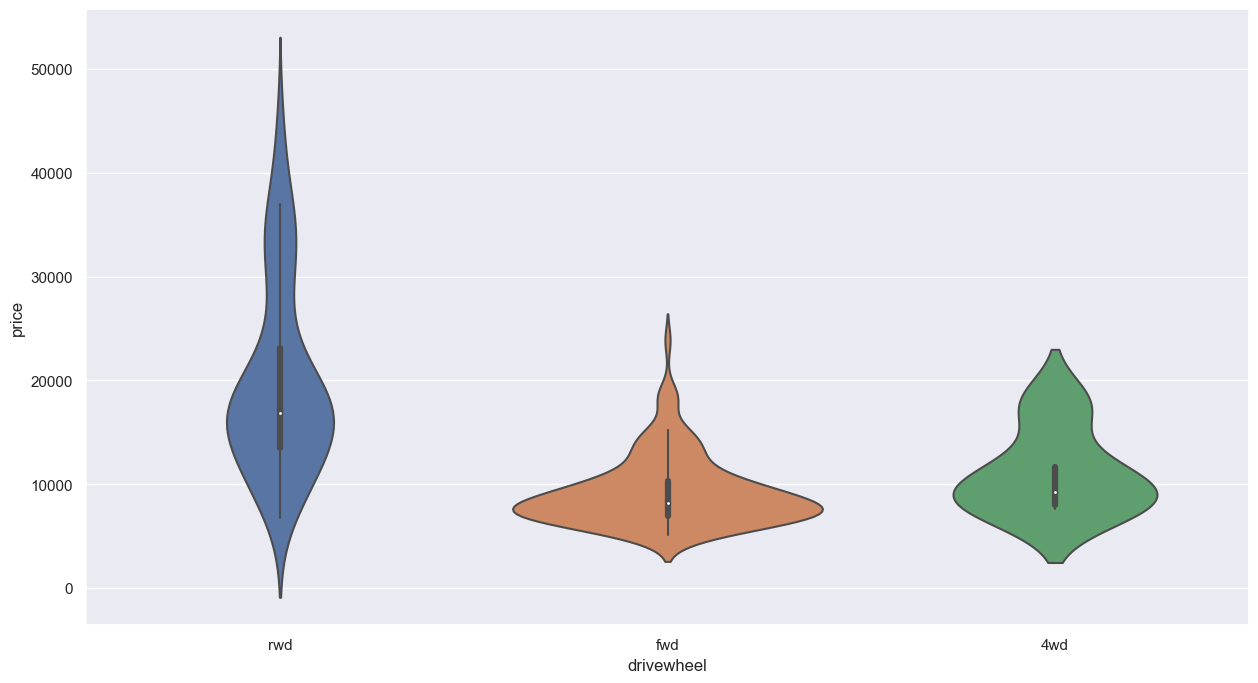

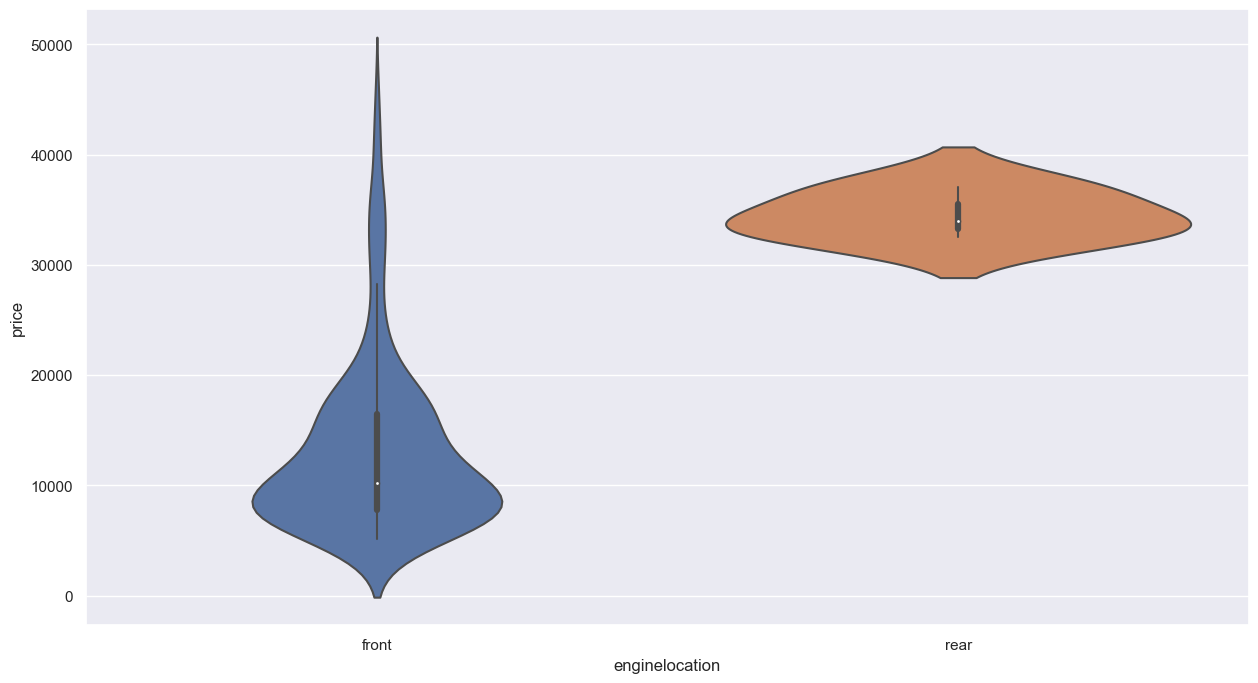

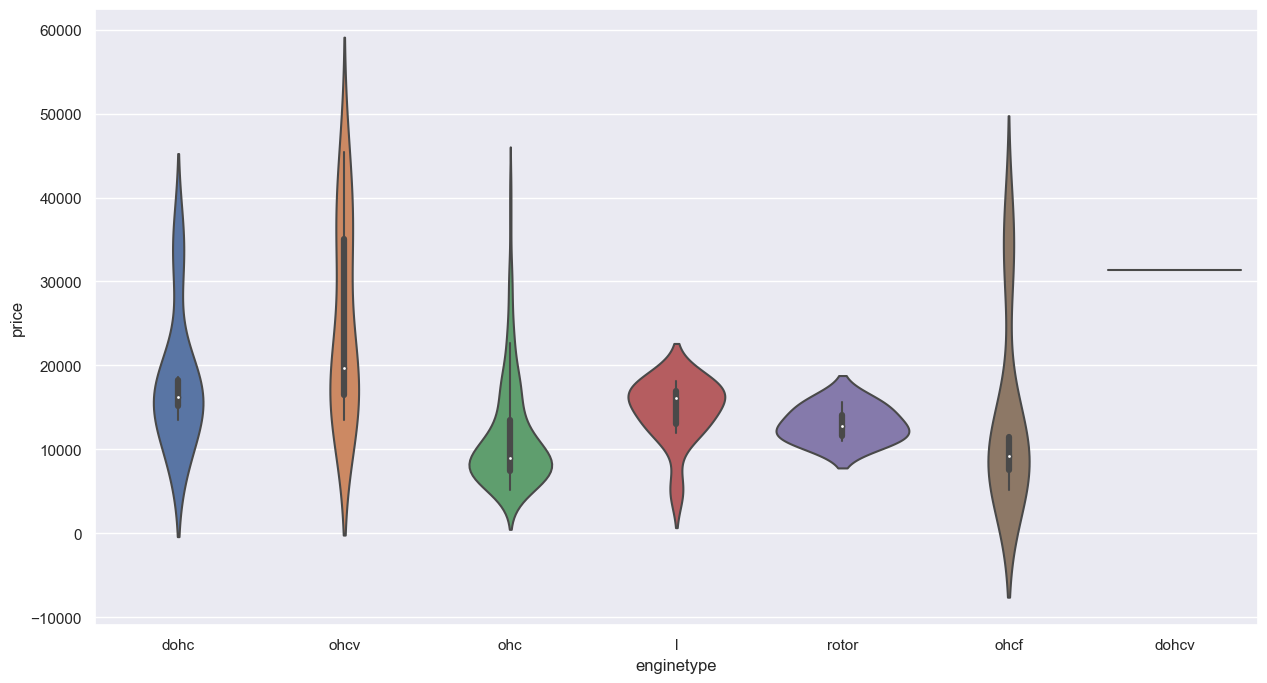

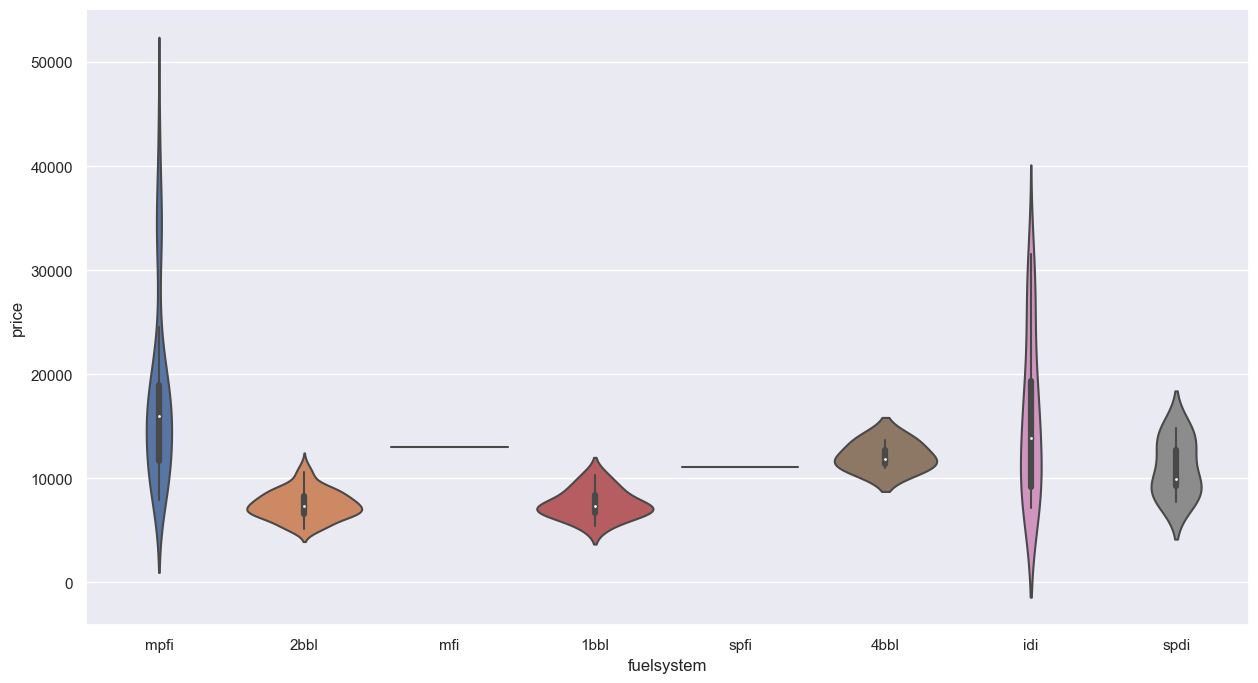

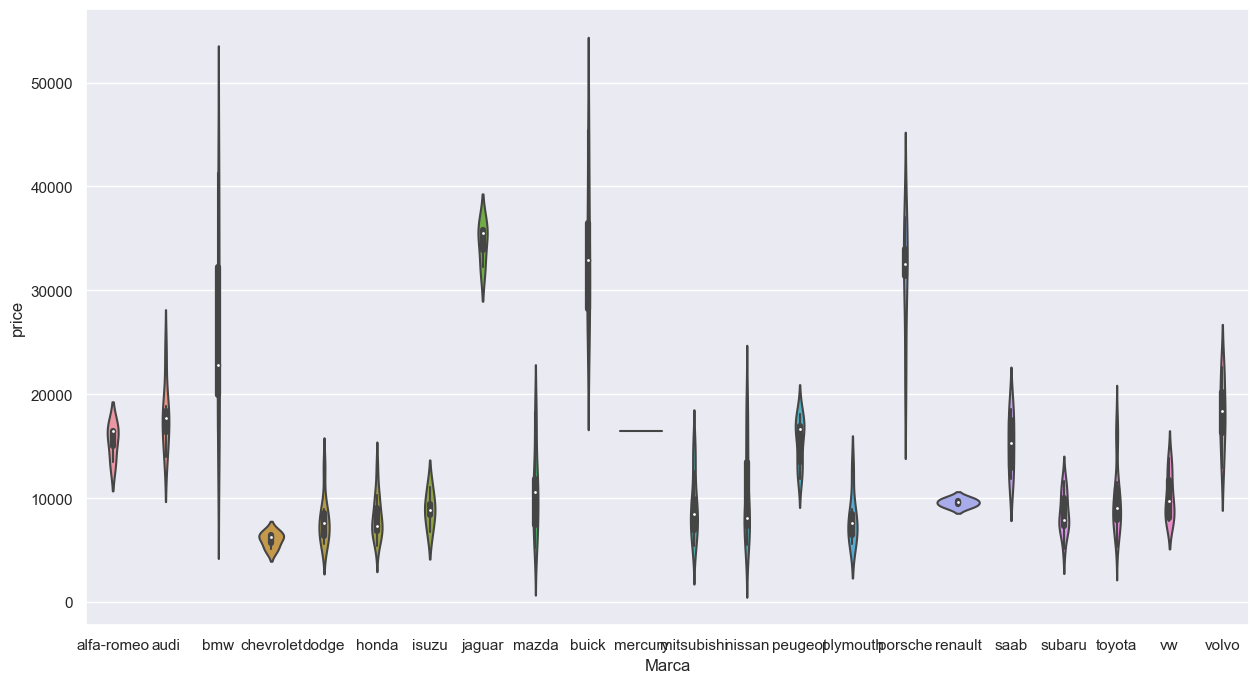

In [37]:
for category in variables_categoricas:                            ##Genero grafico de violin para cada variable categorica del dataset.
    sns.violinplot(x=category, y='price', data=df_cars)
    plt.show()

In [38]:
X=dfCars[['symboling','doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge',
       'Marca_honda', 'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda',
       'Marca_mercury', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_plymouth', 'Marca_porsche', 'Marca_renault', 'Marca_saab',
       'Marca_subaru', 'Marca_toyota', 'Marca_volvo', 'Marca_vw']]
y=dfCars[['price']]


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 
linear_model = LinearRegression()
linear_model.fit(X, y)
from sklearn import metrics

y_pred=linear_model.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 1234.5442673836487
MSE: 3446764.577202771
RMSE: 1856.5464112708767
R2: 0.9502519233586408


Modelo de clasificación

In [40]:
medianaPrice=dfCars['price'].median()
medianaPrice

10295.0

In [41]:
condicion = lambda x: '1' if x > medianaPrice else '0'
dfCars['gama'] = dfCars['price'].apply(condicion)

In [42]:
dfCars

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Modelo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Marca_alfa-romeo,Marca_audi,Marca_bmw,Marca_buick,Marca_chevrolet,Marca_dodge,Marca_honda,Marca_isuzu,Marca_jaguar,Marca_mazda,Marca_mercury,Marca_mitsubishi,Marca_nissan,Marca_peugeot,Marca_plymouth,Marca_porsche,Marca_renault,Marca_saab,Marca_subaru,Marca_toyota,Marca_volvo,Marca_vw,gama
0,1,3,alfa-romero giulia,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2,audi 100 ls,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2,audi 100ls,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4.0,109.1,188.8,68.9,55.5,2952,4.0,141,3.78,3.15,9.5,114,5400,23,28,16845.0,145e (sw),0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
201,202,-1,volvo 144ea,4.0,109.1,188.8,68.8,55.5,3049,4.0,141,3.78,3.15,8.7,160,5300,19,25,19045.0,144ea,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
202,203,-1,volvo 244dl,4.0,109.1,188.8,68.9,55.5,3012,6.0,173,3.58,2.87,8.8,134,5500,18,23,21485.0,244dl,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
203,204,-1,volvo 246,4.0,109.1,188.8,68.9,55.5,3217,6.0,145,3.01,3.40,23.0,106,4800,26,27,22470.0,246,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


REGRESION LOGISTICA

In [43]:
X=dfCars[['symboling','doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge',
       'Marca_honda', 'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda',
       'Marca_mercury', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_plymouth', 'Marca_porsche', 'Marca_renault', 'Marca_saab',
       'Marca_subaru', 'Marca_toyota', 'Marca_volvo', 'Marca_vw']]
y=dfCars[['gama']]

In [44]:
##### Escalamiento/Normalizacion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X))

In [45]:
##### Modelamiento
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30,random_state=42) 
from sklearn.linear_model import LogisticRegression

modelo_rl = LogisticRegression()
modelo_rl.fit(X_train, y_train)

C:\Users\Valen\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [48]:
#### Generamos predicciones

y_pred_rl = modelo_rl.predict(X_test) ## Punto de corte por defecto = 0.5

threshold = 0.7

y_pred_rl_2 = np.where(modelo_rl.predict_proba(X_test)[:,1]>threshold, 1, 0)

In [49]:
### Evaluamos el modelo 

##### Accuracy: porcentaje de acierto del modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy: ',accuracy_score(y_test, modelo_rl.predict(X_test)))


Accuracy:  0.9193548387096774
